# WeatherPy
#### Python API Homework (python-api-challenge > WeatherPy)  |  by: Shane Gatenby
----

## Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import time
import datetime
from scipy.stats import linregress

# import API keys:
from config import weather_api_key, g_key

# bring in and use citipy to determine city based on latitude and longitude
from citipy import citipy

# set the output csv file & png image output data filepath
# output_data_file = "output_data/cities.csv"
output_data_filepath = "output_data/"

# set the range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate a Cities List

In [2]:
# create list for holding cities, countries, latitudes, longitudes and weather data
cities = []
countries = []
cities_countries = []
lat_lngs = []

# create set of random latitude/longitude combinations        #### NOTE: UPDATE SIZE BACK TO 1500 ####
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# identify the nearest city for each latitude/longitude combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # if the city is unique, then add it to the list: cities
    if city not in cities:
        cities.append(city)
        countries.append(country)
        cities_countries.append([city,country])
        
# print the city count in the list cities to confirm we have a sufficient count
# len(cities)
print(f"The number of random cities in the list is {len(cities_countries)}")

The number of random cities in the list is 616


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# setup lists to hold data retrieved and inserted from API call
weather_data = []
city_data = []
cloudCover_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lng_data = []
temp_data = []
maxTemp_data = []
windSpeed_data = []

# setup counters, initially set to 1, to count cities with API calls that successfully retrieve data
city_counter = 1
set_of_cities_counter = 1
city_in_set_counter = 1

# setup pieces of API call url/address (base_url and units)
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
# perform the API call...fingers crossed, here we go!

# start log for data retrieval from API Call
print("Beginning Data Retrieval")
print("-----------------------------")

# loop through cities & complete API call for each; append weather_data with data when successful
for x in range(len(cities_countries)):
    q_city = cities[x]
    q_city = cities_countries[x][0]
    q_country = cities_countries[x][1]
    query_url = f"{base_url}appid={weather_api_key}&units={units}&q={q_city},{q_country}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

# exception handling for when there is no data returned from the API call
    try:
        print(f"Processing Record {city_counter} ({city_in_set_counter} of set {set_of_cities_counter}) | {weather_json['name']}, {weather_json['sys']['country']}")
        weather_data.append(weather_json)

        # append lists with new data (to be placed in data frame later)
        city_data.append(weather_json["name"])
        country_data.append(weather_json["sys"]["country"])
        cloudCover_data.append(weather_json["clouds"]["all"])
        date_data.append(weather_json["dt"])
        humidity_data.append(weather_json["main"]["humidity"])
        lat_data.append(weather_json["coord"]["lat"])
        lng_data.append(weather_json["coord"]["lon"])
        temp_data.append(weather_json["main"]["temp"])
        maxTemp_data.append(weather_json["main"]["temp_max"])
        windSpeed_data.append(weather_json["wind"]["speed"])

        # update counters
        city_counter += 1
        
        # for set counters, once 50 is reached: reset city_in_set_counter = 1 and add 1 to set_of_cities_counter
        if city_in_set_counter >= 50:
            set_of_cities_counter += 1
            city_in_set_counter = 1
        else:
            city_in_set_counter += 1

    except:
        print(f"Skipping...  City ({q_city}, {q_country}) is not found.")
              
    # end log for data retrieval; print "Data Retrieval Complete" when at the end of the loop
    if x == max(range(len(cities_countries))):
        print("----------------------------")
        print("Data Retrieval Complete")
        print("----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 (1 of set 1) | Barrow, US
Processing Record 2 (2 of set 1) | Victoria, SC
Processing Record 3 (3 of set 1) | Ternate, ID
Skipping...  City (barentsburg, sj) is not found.
Processing Record 4 (4 of set 1) | Puerto Ayora, EC
Processing Record 5 (5 of set 1) | Avarua, CK
Processing Record 6 (6 of set 1) | Saint-Augustin, CA
Processing Record 7 (7 of set 1) | Punta Arenas, CL
Processing Record 8 (8 of set 1) | Luderitz, NA
Processing Record 9 (9 of set 1) | Aksarka, RU
Processing Record 10 (10 of set 1) | Kaifeng, CN
Processing Record 11 (11 of set 1) | Saldanha, ZA
Processing Record 12 (12 of set 1) | Auki, SB
Processing Record 13 (13 of set 1) | Morant Bay, JM
Processing Record 14 (14 of set 1) | New Norfolk, AU
Processing Record 15 (15 of set 1) | Monrovia, LR
Skipping...  City (yirol, sd) is not found.
Processing Record 16 (16 of set 1) | Albany, AU
Processing Record 17 (17 of set 1) | Karratha, AU
Processing Re

Processing Record 141 (41 of set 3) | Flinders, AU
Processing Record 142 (42 of set 3) | Khatanga, RU
Processing Record 143 (43 of set 3) | Bahia Blanca, AR
Processing Record 144 (44 of set 3) | Caravelas, BR
Skipping...  City (ye, mm) is not found.
Processing Record 145 (45 of set 3) | Hoima, UG
Processing Record 146 (46 of set 3) | Dikson, RU
Processing Record 147 (47 of set 3) | Malaryta, BY
Processing Record 148 (48 of set 3) | Hasaki, JP
Processing Record 149 (49 of set 3) | Saskylakh, RU
Skipping...  City (umzimvubu, za) is not found.
Processing Record 150 (50 of set 3) | Arraial do Cabo, BR
Processing Record 151 (1 of set 4) | Lida, BY
Processing Record 152 (2 of set 4) | Aykhal, RU
Processing Record 153 (3 of set 4) | Baharly, TM
Processing Record 154 (4 of set 4) | Nar'yan-Mar, RU
Processing Record 155 (5 of set 4) | Alta Floresta, BR
Processing Record 156 (6 of set 4) | Alyth, GB
Processing Record 157 (7 of set 4) | Broome, AU
Processing Record 158 (8 of set 4) | Carndonagh, 

Processing Record 287 (37 of set 6) | Batsfjord, NO
Processing Record 288 (38 of set 6) | Hambantota, LK
Processing Record 289 (39 of set 6) | Rawson, AR
Processing Record 290 (40 of set 6) | Ciudad de Armeria, MX
Skipping...  City (malwan, in) is not found.
Processing Record 291 (41 of set 6) | Rurrenabaque, BO
Skipping...  City (ngukurr, au) is not found.
Processing Record 292 (42 of set 6) | Ilulissat, GL
Processing Record 293 (43 of set 6) | Kumul, CN
Processing Record 294 (44 of set 6) | Caucaia, BR
Processing Record 295 (45 of set 6) | Erenhot, CN
Processing Record 296 (46 of set 6) | Kysyl-Syr, RU
Processing Record 297 (47 of set 6) | Bulungu, CD
Processing Record 298 (48 of set 6) | Raudeberg, NO
Processing Record 299 (49 of set 6) | Geraldton, AU
Processing Record 300 (50 of set 6) | Rhodes, GR
Processing Record 301 (1 of set 7) | Mayna, RU
Processing Record 302 (2 of set 7) | Melfi, TD
Skipping...  City (asau, tv) is not found.
Processing Record 303 (3 of set 7) | Vardo, NO
S

Processing Record 435 (35 of set 9) | Burns Lake, CA
Processing Record 436 (36 of set 9) | Norman, US
Processing Record 437 (37 of set 9) | Bluefield, US
Skipping...  City (kemijarvi, fi) is not found.
Processing Record 438 (38 of set 9) | Chimoio, MZ
Processing Record 439 (39 of set 9) | Carballo, ES
Processing Record 440 (40 of set 9) | Eureka, US
Processing Record 441 (41 of set 9) | Changde, CN
Processing Record 442 (42 of set 9) | Samoded, RU
Processing Record 443 (43 of set 9) | Svetlogorsk, RU
Processing Record 444 (44 of set 9) | San Quintin, MX
Skipping...  City (goderich, sl) is not found.
Processing Record 445 (45 of set 9) | Assiut, EG
Processing Record 446 (46 of set 9) | Jacqueville, CI
Processing Record 447 (47 of set 9) | Shelburne, CA
Processing Record 448 (48 of set 9) | Ossora, RU
Processing Record 449 (49 of set 9) | Isangel, VU
Processing Record 450 (50 of set 9) | Mogadishu, SO
Processing Record 451 (1 of set 10) | Terrace, CA
Skipping...  City (haapu, pf) is not 

In [ ]:
# weather_data
# Print the json (pretty printed)
# print(json.dumps(weather_data, indent=4, sort_keys=True))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({
    "City" : city_data,
    "Country" : country_data,
    "Cloudiness" : cloudCover_data,
    "Date" : date_data,
    "Humidity" : humidity_data,
    "Lat" : lat_data,
    "Lng" : lng_data,
    "Temp" : temp_data,
    "Max Temp" : maxTemp_data,
    "Wind Speed" : windSpeed_data
})


In [8]:
# count the number of records in each column to make sure they all match
weather_df.count()

City          551
Country       551
Cloudiness    551
Date          551
Humidity      551
Lat           551
Lng           551
Temp          551
Max Temp      551
Wind Speed    551
dtype: int64

In [9]:
# show the top 5 rows of the data frame
weather_df.head()

City Country  Cloudiness        Date  Humidity    Lat     Lng  \
0        Barrow      US           1  1579917160        68  71.29 -156.79   
1      Victoria      SC          20  1579917460        83  -4.62   55.45   
2       Ternate      ID          41  1579917460        58   0.80  127.40   
3  Puerto Ayora      EC          23  1579917460        57  -0.74  -90.35   
4        Avarua      CK          80  1579917174        88 -21.21 -159.78   

    Temp  Max Temp  Wind Speed  
0 -18.40    -18.40       10.29  
1  82.40     82.40        3.36  
2  87.67     87.67        5.39  
3  77.00     77.00        1.01  
4  82.40     82.40        8.05

In [10]:
# export/save dataframe to csv file (to avoid potential issues later, using encoding="utf-8")
# weather_df.to_csv(output_data_file, encoding="utf-8", index=False)
weather_df.to_csv(f"{output_data_filepath}cities_weather.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

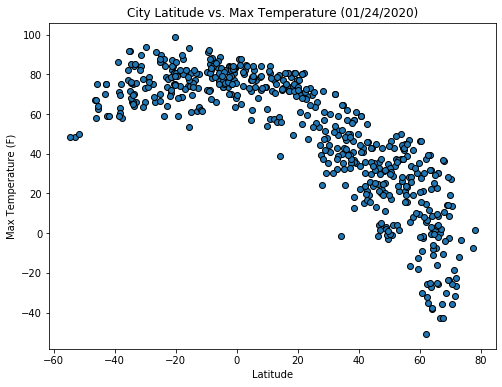

In [31]:
# Generate a scatter plot of Latitude vs. Temperature (max)

# create two lists of the data to be plotted on the scatter plot
# latVStemp_x_values = weather_df["Lat"].tolist()
latVStemp_x_values = weather_df.iloc[:,5]
# latVStemp_y_values = weather_df["Max Temp"].tolist()
latVStemp_y_values = weather_df.iloc[:,8]

# date_for_plot = datetime.datetime.fromtimestamp(min(weather_df["Date"])).strftime('%m/%d/%Y')
date_for_plot = datetime.datetime.fromtimestamp(sum(weather_df["Date"]) / len(weather_df["Date"])).strftime("%m/%d/%Y")

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(latVStemp_x_values,
            latVStemp_y_values,
#             color="blue",
            edgecolors='black'
           )
# plt.title(f"City Latitude vs. Max Temperature (xxDATExx)")
plt.title(f"City Latitude vs. Max Temperature ({date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# export/save figure to png file
plt.savefig(f"{output_data_filepath}latitude_vs_temp_plot.png")

plt.show()

### City Latitude vs. Temperature (max): what the code is and what is it analyzing?

*  What the code is doing...
    *  First, extracting x and y values for the scatter plot from the weather data frame.  X is the Latitude; Y is the Max Temperature for the cities randomly selected from across the globe.
    *  Then, the date value is averaged (between all values; all same date, minor variance in unix timestamp, presumably because of when that city's lats/longs were called using the API).  Averaging to get one usable value, then converting from unix to a readable date format and inserting into title of the scatter plot.
    *  Finally, we set the size of the plot, plot the values, set some chart properties, create labels, create an image file and show the plot in the jupyter notebook.
    
*  What is the chart analyzing...
    *  We are looking at the max temperatures for cities in our data frame in relation to its Latitude (north/south position).  Currently, in January we are in the middle of winter in the northern hemisphere and we see a pattern.  Temperatures appear to be aggressively lower on the right side of the chart - lower as we get closer to the north pole where the earth is tilted most away from the sun.  Conversely, on the left side of the chart - toward the south pole - the temperatures are all much higher as the south end of the earth is positioned closer to the sun during the Southern Hemisphere's summer.

#### Latitude vs. Humidity Plot

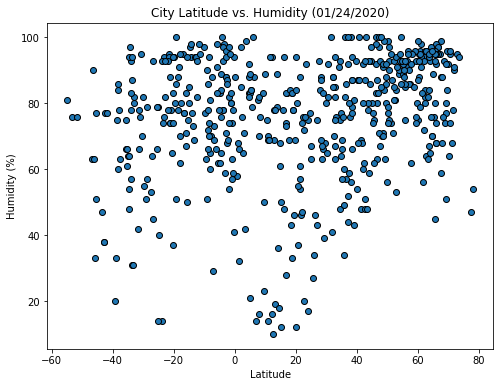

In [32]:
# Generate a scatter plot of Latitude vs. Humidity

# create two lists of the data to be plotted on the scatter plot
latVShumidity_x_values = weather_df.iloc[:,5]
latVShumidity_y_values = weather_df.iloc[:,4]

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(latVShumidity_x_values,
            latVShumidity_y_values,
#             color="blue",
            edgecolors='black'
           )
plt.title(f"City Latitude vs. Humidity ({date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# export/save figure to png file
plt.savefig(f"{output_data_filepath}latitude_vs_humidity_plot.png")

plt.show()

### City Latitude vs. Humidity: what the code is and what is it analyzing?

*  What the code is doing...
    *  First, extract x and y values for the scatter plot from the weather data frame.  X is the Latitude; Y is the Percent Humidity.
    *  Then, the size of the plot is set, values plotted, chart properties set, labels created, an image file is created and then the plot is shown.
    
*  What is the chart analyzing...
    *  We are looking at the humidity % for cities in our data frame in relation to its Latitude.  There doesnâ€™t appear to be a very strong correlation between latitude and humidity for our cities.  While it looks like there are a higher number data points of high humidity (~>70%) vs lower, more might slightly appear on the right side (or at higher latitudes), there are quite a few also on the left side (southern hemisphere), concentrated heavily -20 to 0 Latitudes.  Latitude doesn't appear to affect humidity.

#### Latitude vs. Cloudiness Plot

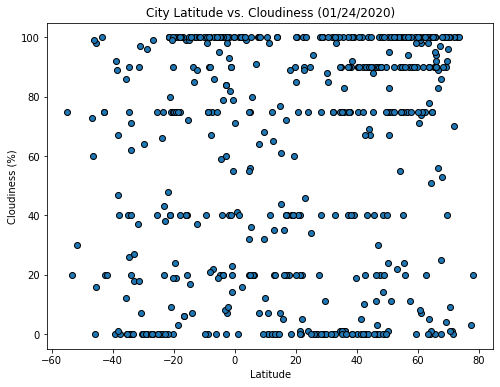

In [33]:
# Generate a scatter plot of Latitude vs. Cloudiness

# create two lists of the data to be plotted on the scatter plot
latVScloudiness_x_values = weather_df.iloc[:,5]
latVScloudiness_y_values = weather_df.iloc[:,2]

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(latVScloudiness_x_values,
            latVScloudiness_y_values,
#             color="blue",
            edgecolors='black'
           )
plt.title(f"City Latitude vs. Cloudiness ({date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# export/save figure to png file
plt.savefig(f"{output_data_filepath}latitude_vs_cloudiness_plot.png")

plt.show()

### City Latitude vs. Cloudiness: what the code is and what is it analyzing?

*  What the code is doing...
    *  Same as above, but the Y value plotted is the Percent Cloudiness.
    
*  What is the chart analyzing...
    *  In this scatter plot, the % cloud cover is plotted for cities in our data frame in relation to its Latitude.  There does not appear to much of a correlation at all between latitude and cloudiness.  From eyeballing it, it is interesting to me to note the common percentages reported: 0%, 20%, 40%, 75%, 90% and 100%.  You can almost connect the dots to get a horizontal line with those data points.  It appears that the percent cloudiness measurement may be more subjective - or what a human observer is reporting vs an actual measurement by weather instruments.

#### Latitude vs. Wind Speed Plot

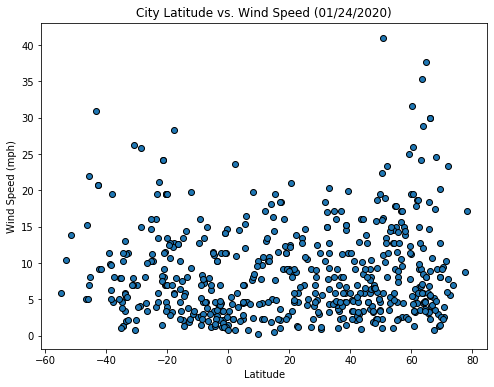

In [34]:
# Generate a scatter plot of Latitude vs. Wind Speed

# create two lists of the data to be plotted on the scatter plot
latVSwindspeed_x_values = weather_df.iloc[:,5]
latVSwindspeed_y_values = weather_df.iloc[:,9]

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(latVSwindspeed_x_values,
            latVSwindspeed_y_values,
#             color="blue",
            edgecolors='black'
           )
plt.title(f"City Latitude vs. Wind Speed ({date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# export/save figure to png file
plt.savefig(f"{output_data_filepath}latitude_vs_wind_speed_plot.png")

plt.show()

### City Latitude vs. Wind Speed: what the code is and what is it analyzing?

*  What the code is doing...
    *  Same as above, but the Y value plotted is the wind speed, in miles per hour.
    
*  What is the chart analyzing...
    *  In this scatter plot, the wind speeds are plotted for cities in our data frame in relation to its N/S position.  Again, there does not appear to much of a correlation at all between latitude and wind speed.  Most of the points appear between 0 and 10 mph from north to south pole, with various other higher wind speed points scattered throughout.  Though higher wind speeds appear to possibly be polarized.

## Linear Regression

#### OPTIONAL: Create a function to create Linear Regression plots

In [35]:
# create function to calculate the linear regression plots and various other linregress() values
def lr_func(x_value, y_value):
    (slope_value, intercept_value, r_value, p_value, stderr_value) = linregress(x_value, y_value)
    line_eq_value = "y = " + str(round(slope_value,2)) + "x + " + str(round(intercept_value,2))
    regress_values = x_value * slope_value + intercept_value
#     return slope_value, intercept_value, r_value, p_value, stderr_value, line_eq_value, [regress_values]
    return {"slope_value": slope_value,
            "intercept_value": intercept_value,
            "r_value": r_value,
            "p_value": p_value,
            "stderr_value": stderr_value,
            "line_eq_value": line_eq_value,
            "regress_values": regress_values
    }


In [36]:
# create Northern and Southern Hemisphere data frames
n_hmsphr_wx_df = weather_df.loc[weather_df["Lat"] >= 0 ,:]
s_hmsphr_wx_df = weather_df.loc[weather_df["Lat"] < 0 ,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.841813053173974


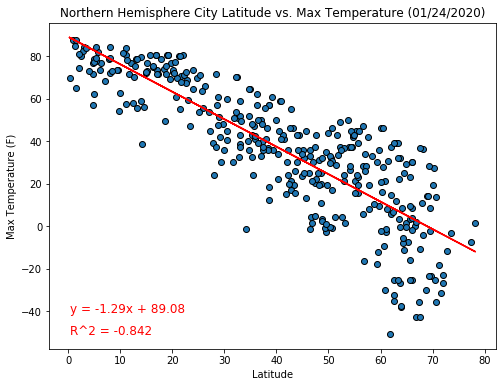

In [37]:
# create lists of the data to be plotted on the scatter plot
n_latVStemp_x_values = n_hmsphr_wx_df.iloc[:,5]
n_latVStemp_y_values = n_hmsphr_wx_df.iloc[:,8]
n_latVStemp_r_value = lr_func(n_latVStemp_x_values, n_latVStemp_y_values)["r_value"]
n_latVStemp_on_plot_label_x_loc = min(n_latVStemp_x_values)
n_latVStemp_on_plot_label_y_loc = min(n_latVStemp_y_values)

# date_for_plot = datetime.datetime.fromtimestamp(min(weather_df["Date"])).strftime('%m/%d/%Y')
n_date_for_plot = datetime.datetime.fromtimestamp(sum(n_hmsphr_wx_df["Date"]) / len(n_hmsphr_wx_df["Date"])).strftime("%m/%d/%Y")

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(n_latVStemp_x_values,
            n_latVStemp_y_values,
            edgecolors='black'
           )
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({n_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# # Plot regression line
plt.plot(n_latVStemp_x_values,lr_func(n_latVStemp_x_values, n_latVStemp_y_values)["regress_values"],"r-")
plt.annotate(lr_func(n_latVStemp_x_values, n_latVStemp_y_values)["line_eq_value"],
#              (6,10),
             (n_latVStemp_on_plot_label_x_loc ,n_latVStemp_on_plot_label_y_loc + 10),
             fontsize=12,
             color="red")

# # Print r square value
print(f"The r-squared value is: {n_latVStemp_r_value}")
plt.annotate(f"R^2 = {n_latVStemp_r_value.round(3)}",
#              (6,0),
             (n_latVStemp_on_plot_label_x_loc ,n_latVStemp_on_plot_label_y_loc),
             fontsize=12,
             color="red")

# export/save figure to png file
plt.savefig(f"{output_data_filepath}n_hemis_latitude_vs_temp_plot.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3718788032217586


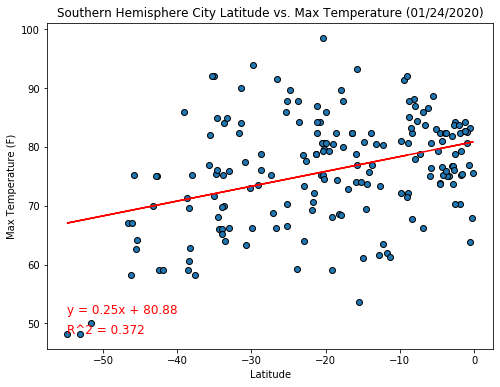

In [38]:
# create lists of the data to be plotted on the scatter plot
s_latVStemp_x_values = s_hmsphr_wx_df.iloc[:,5]
s_latVStemp_y_values = s_hmsphr_wx_df.iloc[:,8]
s_latVStemp_r_value = lr_func(s_latVStemp_x_values, s_latVStemp_y_values)["r_value"]
s_latVStemp_on_plot_label_x_loc = min(s_latVStemp_x_values)
s_latVStemp_on_plot_label_y_loc = min(s_latVStemp_y_values)

# date_for_plot = datetime.datetime.fromtimestamp(min(weather_df["Date"])).strftime('%m/%d/%Y')
s_date_for_plot = datetime.datetime.fromtimestamp(sum(s_hmsphr_wx_df["Date"]) / len(s_hmsphr_wx_df["Date"])).strftime("%m/%d/%Y")

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(s_latVStemp_x_values,
            s_latVStemp_y_values,
            edgecolors='black'
           )
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature ({s_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# # Plot regression line
plt.plot(s_latVStemp_x_values,lr_func(s_latVStemp_x_values, s_latVStemp_y_values)["regress_values"],"r-")
plt.annotate(lr_func(s_latVStemp_x_values, s_latVStemp_y_values)["line_eq_value"],
             (s_latVStemp_on_plot_label_x_loc ,s_latVStemp_on_plot_label_y_loc + 3.5),
             fontsize=12,
             color="red")

# # Print r square value
print(f"The r-squared value is: {s_latVStemp_r_value}")
plt.annotate(f"R^2 = {s_latVStemp_r_value.round(3)}",
             (s_latVStemp_on_plot_label_x_loc ,s_latVStemp_on_plot_label_y_loc),
             fontsize=12,
             color="red")

# export/save figure to png file
plt.savefig(f"{output_data_filepath}s_hemis_latitude_vs_temp_plot.png")

plt.show()

### Northern/Southern Hemisphere City Latitude vs. Temperature (max):

*  What the linear regression is modeling & other analysis/commentary...
    *  As mentioned in the Latitude vs Max Temperature where both Northern and Southern hemispheres cities are plotted, there does appear to be a correlation between the two - and the linear regression model appears to support this.  Correlation appears much stronger in the northern hemisphere with an R-squared value of 0.84, less so in the southern hemisphere, but still the points generally trend lower on the left side (lower latitudes; extremely cold temps toward the pole) and the higher on the right side closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.38392962153544885


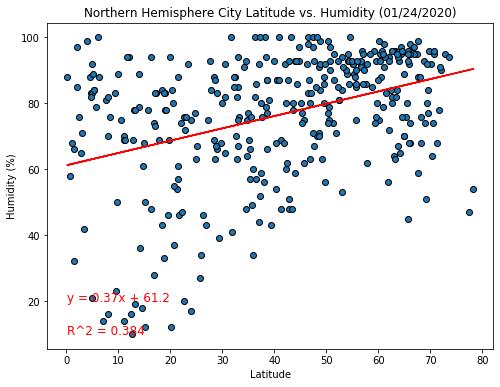

In [39]:
# create lists of the data to be plotted on the scatter plot
n_latVShumidity_x_values = n_hmsphr_wx_df.iloc[:,5]
n_latVShumidity_y_values = n_hmsphr_wx_df.iloc[:,4]
n_latVShumidity_r_value = lr_func(n_latVShumidity_x_values, n_latVShumidity_y_values)["r_value"]
n_latVShumidity_on_plot_label_x_loc = min(n_latVShumidity_x_values)
n_latVShumidity_on_plot_label_y_loc = min(n_latVShumidity_y_values)

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(n_latVShumidity_x_values,
            n_latVShumidity_y_values,
            edgecolors='black'
           )
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({n_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot regression line
plt.plot(n_latVShumidity_x_values,lr_func(n_latVShumidity_x_values, n_latVShumidity_y_values)["regress_values"],"r-")
plt.annotate(lr_func(n_latVShumidity_x_values, n_latVShumidity_y_values)["line_eq_value"],
             (n_latVShumidity_on_plot_label_x_loc ,n_latVShumidity_on_plot_label_y_loc + 10),
             fontsize=12,
             color="red"
             )

# Print r square value
print(f"The r-squared value is: {n_latVShumidity_r_value}")
plt.annotate(f"R^2 = {n_latVShumidity_r_value.round(3)}",
             (n_latVShumidity_on_plot_label_x_loc ,n_latVShumidity_on_plot_label_y_loc),
             fontsize=12,
             color="red"
             )

# export/save figure to png file
plt.savefig(f"{output_data_filepath}n_hemis_latitude_vs_humidity_plot.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.2607303237630865


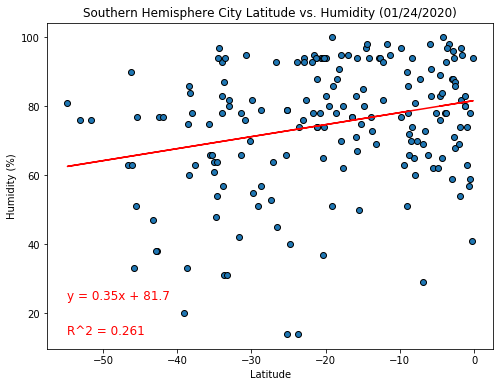

In [40]:
# create lists of the data to be plotted on the scatter plot
s_latVShumidity_x_values = s_hmsphr_wx_df.iloc[:,5]
s_latVShumidity_y_values = s_hmsphr_wx_df.iloc[:,4]
s_latVShumidity_r_value = lr_func(s_latVShumidity_x_values, s_latVShumidity_y_values)["r_value"]
s_latVShumidity_on_plot_label_x_loc = min(s_latVShumidity_x_values)
s_latVShumidity_on_plot_label_y_loc = min(s_latVShumidity_y_values)

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(s_latVShumidity_x_values,
            s_latVShumidity_y_values,
            edgecolors='black'
           )
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({s_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot regression line
plt.plot(s_latVShumidity_x_values,lr_func(s_latVShumidity_x_values, s_latVShumidity_y_values)["regress_values"],"r-")
plt.annotate(lr_func(s_latVShumidity_x_values, s_latVShumidity_y_values)["line_eq_value"],
             (s_latVShumidity_on_plot_label_x_loc ,s_latVShumidity_on_plot_label_y_loc + 10),
             fontsize=12,
             color="red"
             )

# Print r square value
print(f"The r-squared value is: {s_latVShumidity_r_value}")
plt.annotate(f"R^2 = {s_latVShumidity_r_value.round(3)}",
             (s_latVShumidity_on_plot_label_x_loc ,s_latVShumidity_on_plot_label_y_loc),
             fontsize=12,
             color="red"
             )

# export/save figure to png file
plt.savefig(f"{output_data_filepath}s_hemis_latitude_vs_humidity_plot.png")

plt.show()

### Northern/Southern Hemisphere City Latitude vs. Humidity:

*  What the linear regression is modeling & other analysis/commentary...
    *  These linear regression plots are plotting the cities latitudes and levels of humidity, for the northern and southern hemispheres, respectively.  There does not appear to be too strong of a correlation in the two data points in the northern hemisphere, far weaker in the southern hemisphere where the points are spread further from the linear regression plot.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.2373445905333556


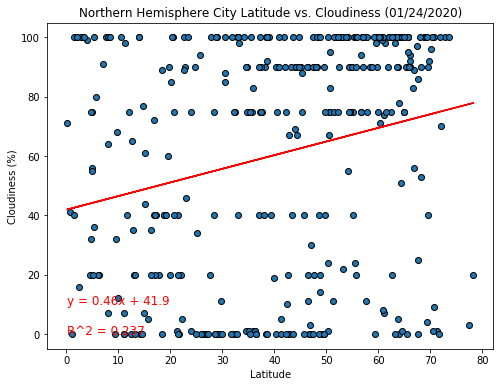

In [41]:
# create lists of the data to be plotted on the scatter plot
n_latVScloudiness_x_values = n_hmsphr_wx_df.iloc[:,5]
n_latVScloudiness_y_values = n_hmsphr_wx_df.iloc[:,2]
n_latVScloudiness_r_value = lr_func(n_latVScloudiness_x_values, n_latVScloudiness_y_values)["r_value"]
n_latVScloudiness_on_plot_label_x_loc = min(n_latVScloudiness_x_values)
n_latVScloudiness_on_plot_label_y_loc = min(n_latVScloudiness_y_values)

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(n_latVScloudiness_x_values,
            n_latVScloudiness_y_values,
            edgecolors='black'
           )
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({n_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot regression line
plt.plot(n_latVScloudiness_x_values,lr_func(n_latVScloudiness_x_values, n_latVScloudiness_y_values)["regress_values"],"r-")
plt.annotate(lr_func(n_latVScloudiness_x_values, n_latVScloudiness_y_values)["line_eq_value"],
             (n_latVScloudiness_on_plot_label_x_loc ,n_latVScloudiness_on_plot_label_y_loc + 10),
             fontsize=12,
             color="red"
             )

# Print r square value
print(f"The r-squared value is: {n_latVScloudiness_r_value}")
plt.annotate(f"R^2 = {n_latVScloudiness_r_value.round(3)}",
             (n_latVScloudiness_on_plot_label_x_loc ,n_latVScloudiness_on_plot_label_y_loc),
             fontsize=12,
             color="red"
             )

# export/save figure to png file
plt.savefig(f"{output_data_filepath}n_hemis_latitude_vs_cloudiness_plot.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.28275105297172265


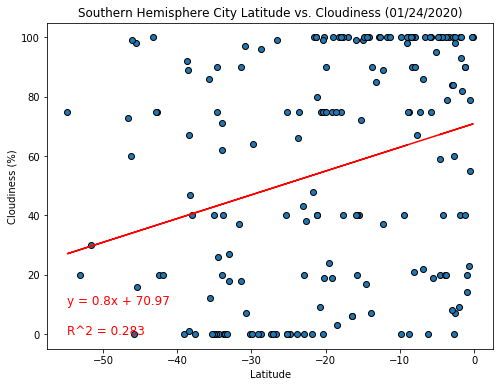

In [42]:
# create lists of the data to be plotted on the scatter plot
s_latVScloudiness_x_values = s_hmsphr_wx_df.iloc[:,5]
s_latVScloudiness_y_values = s_hmsphr_wx_df.iloc[:,2]
s_latVScloudiness_r_value = lr_func(s_latVScloudiness_x_values, s_latVScloudiness_y_values)["r_value"]
s_latVScloudiness_on_plot_label_x_loc = min(s_latVScloudiness_x_values)
s_latVScloudiness_on_plot_label_y_loc = min(s_latVScloudiness_y_values)

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(s_latVScloudiness_x_values,
            s_latVScloudiness_y_values,
            edgecolors='black'
           )
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({s_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot regression line
plt.plot(s_latVScloudiness_x_values,lr_func(s_latVScloudiness_x_values, s_latVScloudiness_y_values)["regress_values"],"r-")
plt.annotate(lr_func(s_latVScloudiness_x_values, s_latVScloudiness_y_values)["line_eq_value"],
             (s_latVScloudiness_on_plot_label_x_loc ,s_latVScloudiness_on_plot_label_y_loc + 10),
             fontsize=12,
             color="red"
             )

# Print r square value
print(f"The r-squared value is: {s_latVScloudiness_r_value}")
plt.annotate(f"R^2 = {s_latVScloudiness_r_value.round(3)}",
             (s_latVScloudiness_on_plot_label_x_loc ,s_latVScloudiness_on_plot_label_y_loc),
             fontsize=12,
             color="red"
             )

# export/save figure to png file
plt.savefig(f"{output_data_filepath}s_hemis_latitude_vs_cloudiness_plot.png")

plt.show()

### Northern/Southern Hemisphere City Latitude vs. Cloudiness:

*  What the linear regression is modeling & other analysis/commentary...
    *  These linear regression plots are plotting the cities latitudes and percentage of cloud cover, for the northern and southern hemispheres, respectively.  Once again, there appears to be a weak correlation with points scattered broadly and well away from the linear regression plot line.  And similar to where the northern and southern hemisphere cities were plotted together, common measurements value appear.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.13584417788791636


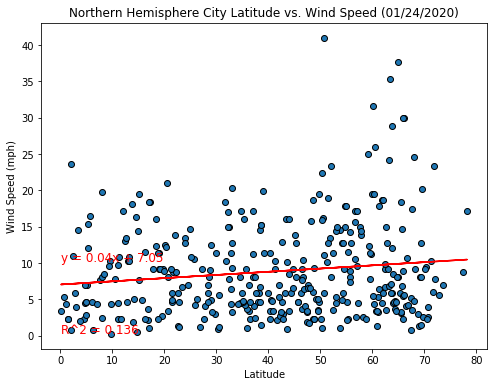

In [43]:
# create lists of the data to be plotted on the scatter plot
n_latVSwindspeed_x_values = n_hmsphr_wx_df.iloc[:,5]
n_latVSwindspeed_y_values = n_hmsphr_wx_df.iloc[:,9]
n_latVSwindspeed_r_value = lr_func(n_latVSwindspeed_x_values, n_latVSwindspeed_y_values)["r_value"]
n_latVSwindspeed_on_plot_label_x_loc = min(n_latVSwindspeed_x_values)
n_latVSwindspeed_on_plot_label_y_loc = min(n_latVSwindspeed_y_values)

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(n_latVSwindspeed_x_values,
            n_latVSwindspeed_y_values,
            edgecolors='black'
           )
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed ({n_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot regression line
plt.plot(n_latVSwindspeed_x_values,lr_func(n_latVSwindspeed_x_values, n_latVSwindspeed_y_values)["regress_values"],"r-")
plt.annotate(lr_func(n_latVSwindspeed_x_values, n_latVSwindspeed_y_values)["line_eq_value"],
             (n_latVSwindspeed_on_plot_label_x_loc ,n_latVSwindspeed_on_plot_label_y_loc + 10),
             fontsize=12,
             color="red"
             )

# Print r square value
print(f"The r-squared value is: {n_latVSwindspeed_r_value}")
plt.annotate(f"R^2 = {n_latVSwindspeed_r_value.round(3)}",
             (n_latVSwindspeed_on_plot_label_x_loc ,n_latVSwindspeed_on_plot_label_y_loc),
             fontsize=12,
             color="red"
             )

# export/save figure to png file
plt.savefig(f"{output_data_filepath}n_hemis_latitude_vs_windspeed_plot.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.26195829800448545


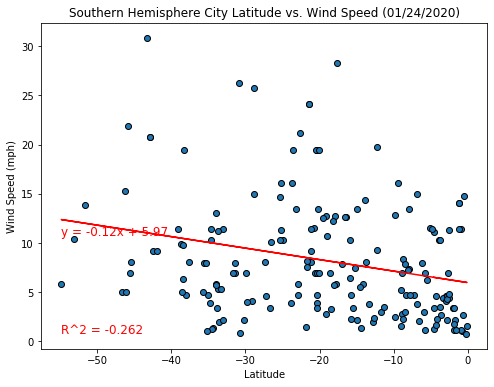

In [44]:
# create lists of the data to be plotted on the scatter plot
s_latVSwindspeed_x_values = s_hmsphr_wx_df.iloc[:,5]
s_latVSwindspeed_y_values = s_hmsphr_wx_df.iloc[:,9]
s_latVSwindspeed_r_value = lr_func(s_latVSwindspeed_x_values, s_latVSwindspeed_y_values)["r_value"]
s_latVSwindspeed_on_plot_label_x_loc = min(s_latVSwindspeed_x_values)
s_latVSwindspeed_on_plot_label_y_loc = min(s_latVSwindspeed_y_values)

# plot the scatter plot and set title and labels chart properties
plt.figure(figsize=(8,6))
plt.scatter(s_latVSwindspeed_x_values,
            s_latVSwindspeed_y_values,
            edgecolors='black'
           )
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed ({s_date_for_plot})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot regression line
plt.plot(s_latVSwindspeed_x_values,lr_func(s_latVSwindspeed_x_values, s_latVSwindspeed_y_values)["regress_values"],"r-")
plt.annotate(lr_func(s_latVSwindspeed_x_values, s_latVSwindspeed_y_values)["line_eq_value"],
             (s_latVSwindspeed_on_plot_label_x_loc ,s_latVSwindspeed_on_plot_label_y_loc + 10),
             fontsize=12,
             color="red"
             )

# Print r square value
print(f"The r-squared value is: {s_latVSwindspeed_r_value}")
plt.annotate(f"R^2 = {s_latVSwindspeed_r_value.round(3)}",
             (s_latVSwindspeed_on_plot_label_x_loc ,s_latVSwindspeed_on_plot_label_y_loc),
             fontsize=12,
             color="red"
             )

# export/save figure to png file
plt.savefig(f"{output_data_filepath}s_hemis_latitude_vs_windspeed_plot.png")

plt.show()

### Northern/Southern Hemisphere City Latitude vs. Wind Speed:

*  What the linear regression is modeling & other analysis/commentary...
    *  These linear regression plots are plotting the cities latitudes and wind speed, for the northern and southern hemispheres, respectively.  There is an incredibly weak correlation in the northern hemisphere, slightly better in the south, albeit still considered weak.